# Model Implementation

After we have made the necessary preprocessing to our dataset. It's time now to select the best model for the problem of predicting home loan default risk. 
Let's try different classification models and select the best out of them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       # Standard plotting library
from time import time

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('data/application_train_final.csv')#application_train_final.csv')
# Success - Display the first record
display(data.head(n=5))

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0.0,0.245232,0.489166,0.537494,0.468924,0.018801,0.888839,0.035563,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0.0,0.279376,0.746352,0.610092,0.722714,0.003541,0.477114,0.066324,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0.0,0.114839,0.244144,0.281783,0.261437,0.010032,0.348534,0.012561,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0.0,0.197108,0.430800,0.573739,0.432648,0.008019,0.350846,0.169663,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0.0,0.184602,0.540824,0.513463,0.551329,0.028663,0.298591,0.169607,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split target and features data
target = data['TARGET']
data = data.drop('TARGET', axis = 1)
data = data.drop('SK_ID_CURR', axis = 1) # Remove application id from features
data.shape[0]
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

/Users/omar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 215052 samples.
Testing set has 92166 samples.


### Model Performance 

The purpose of this project is to minimize the risk of home loan dafualt risk. The dataset given to perform the prediction contains imbalanced class, e.g. the number of default loans compared to successful loan payment number is high. Therefore, accuracy metric could be misleading as some of the classification models outweight the dominant class and will always predict the dominant class. Since the purpose of this project is to minimze the risk, it would be better to reject an applicant that has been classified as default but they appear not (False Positive) than calssifying a default to be successful payment. In other words, it is better to focus on minimzing false negative rate than false positive rate. This suggests to use either Recall, Precision, and/or Area Under the Curve (AUC) for evaluating the model.

In [3]:
TP = np.sum(target) # Counting the ones as this is the naive case. 
FP = target.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

beta = 0.5
fscore = (1 + (beta**2)) * ((precision * recall) / ((beta**2 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.04}, F-score: {:.04}, Recall: {:.04}, Precision: {:.04}]".format(accuracy, fscore, recall, precision))

Naive Predictor: [Accuracy score: 0.08073, F-score: 0.09892, Recall: 1.0, Precision: 0.08073]


In [4]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}

    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
      
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train, predictions_train)

    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['rec_train'] = recall_score(y_train, predictions_train)
        
    # TODO: Compute F-score on the test set which is y_test
    results['rec_test'] = recall_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['pre_train'] = precision_score(y_train, predictions_train)
        
    # TODO: Compute F-score on the test set which is y_test
    results['pre_test'] = precision_score(y_test, predictions_test)
    
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_test).ravel()    
    print("TN: {:}, FP: {:}, FN:{:}, TP:{:}".format(tn, fp, fn, tp))
    # Return the results
    return results

In [5]:
#Import classification models, gridSearch, and evaluation metrics from sklearn
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [6]:
classifiers = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(random_state=48, penalty = 'l2', C = 1)),
    ('XGBoost', XGBClassifier(learning_rate=0.1, gamma=0.2, scale_pos_weight=8))
]

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)* 0.1)
samples_1 = int(len(y_train) * 0.01)

results = {}
for name, cls in classifiers:
    print("Started training", name, "model")
    res = train_predict(cls, samples_10, X_train, y_train, X_test, y_test)
    results[name] = res
    print("Train - Time: {:.04}, Accuracy: {:.04}, f1 score: {:.04}, Recall: {:.04}, Precision: {:.04}".format(res["train_time"], res["acc_train"], res["f_train"], res["rec_train"], res["pre_train"]))
    print("Pred - Time: {:.04}, Accuracy: {:.04}, f1 score: {:.04}, Recall: {:.04}, Precision: {:.04}".format(res["pred_time"], res["acc_test"], res["f_test"], res["rec_test"], res["pre_test"]))
    print("\n")

Started training AdaBoost model
AdaBoostClassifier trained on 21505 samples.
TN: 84610, FP: 19, FN:7532, TP:5
Train - Time: 3.172, Accuracy: 0.9197, f1 score: 0.004873, Recall: 0.0009846, Precision: 0.3864
Pred - Time: 3.384, Accuracy: 0.9181, f1 score: 0.003275, Recall: 0.0006634, Precision: 0.2083


Started training Gaussian Naive Bayes model
GaussianNB trained on 21505 samples.
TN: 3801, FP: 80828, FN:257, TP:7280
Train - Time: 0.1118, Accuracy: 0.1188, f1 score: 0.09966, Recall: 0.9699, Precision: 0.0814
Pred - Time: 1.816, Accuracy: 0.1202, f1 score: 0.1011, Recall: 0.9659, Precision: 0.08263


Started training Logistic Regression model
LogisticRegression trained on 21505 samples.
TN: 84626, FP: 3, FN:7535, TP:2
Train - Time: 0.9781, Accuracy: 0.9197, f1 score: 0.0005784, Recall: 0.0001158, Precision: 0.3333
Pred - Time: 0.3852, Accuracy: 0.9182, f1 score: 0.001323, Recall: 0.0002654, Precision: 0.4


Started training XGBoost model


/Users/omar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/omar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier trained on 21505 samples.
TN: 73223, FP: 11406, FN:4937, TP:2600
Train - Time: 12.81, Accuracy: 0.8238, f1 score: 0.2056, Recall: 0.3539, Precision: 0.1861
Pred - Time: 2.685, Accuracy: 0.8227, f1 score: 0.2045, Recall: 0.345, Precision: 0.1856




In [13]:
accuracy = [{model:results[model]["acc_test"]} for model in results]
f1 = [{model:results[model]["f_test"]} for model in results]
recall = [{model:results[model]["rec_test"]} for model in results]
precision = [{model:results[model]["pre_test"]} for model in results]

In [24]:
accuracy = dict(pair for d in accuracy for pair in d.items())
f1 = dict(pair for d in f1 for pair in d.items())
recall = dict(pair for d in recall for pair in d.items())
precision = dict(pair for d in precision for pair in d.items())

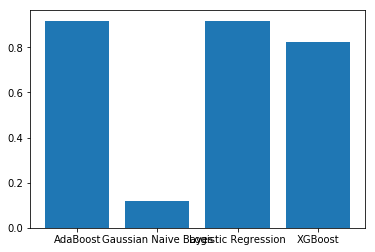

In [25]:
#D = {'Label1':26, 'Label2': 17, 'Label3':30}

plt.bar(range(len(accuracy)), list(accuracy.values()), align='center')
plt.xticks(range(len(accuracy)), list(accuracy.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [66]:
list(D.keys())

['Label1', 'Label2', 'Label3']